In [1]:
import pgr
import networkx as nx
import os
import numpy as np
from collections import Counter 
import matplotlib.pyplot as plt


In [2]:
sdb0 = pgr.SeqDB("/wd/repeat_unit.fa")
sdb0.load_sequences()
sdb0.build_shmmrs_parallel(1, 56, 1)

#sdb1 = pgr.SeqDB("/wd/LPA_repeat_segments.fa")
sdb1 = pgr.SeqDB("/home/yw2245/project_pi_hc895/yw2245/projects/lpa_genotyping/data/openhgl/work/LPA_repeat_segments.fa")

sdb1.load_sequences()
sdb1.build_shmmrs_parallel(1, 56, 1)

In [3]:
shmap = pgr.generate_shmmr_map(sdb0, sdb1, 10240)

In [ ]:
%%time
mq=pgr.map_interval_query(shmap, 
                          sdb0.get_id_by_name("unit0"), 
                          0, sdb0.get_len_by_name("unit0"))
mq2=pgr.map_interval_query(shmap, 
                          sdb0.get_id_by_name("unit1"), 
                          0, sdb0.get_len_by_name("unit1"))
#mq=pgr.find_match_chain(mq)

CPU times: user 1min 20s, sys: 5.85 s, total: 1min 26s
Wall time: 1min 26s


In [5]:
mq2[-5:]

[[1, 5542, 5543, 397, 89112, 89113, 0, 0],
 [1, 5542, 5543, 417, 100208, 100209, 0, 0],
 [1, 5542, 5543, 446, 105764, 105765, 0, 0],
 [1, 5542, 5543, 452, 94663, 94664, 0, 0],
 [1, 5542, 5543, 459, 72481, 72482, 0, 0]]

In [6]:
matches = {}
for r in mq + mq2:
    key =  r[3], r[-1]
    matches.setdefault(key, [])
    matches[key].append(r)

In [7]:
def grouping_hits(hm):
    groups = []
    tol = 1000
    for h, m in hm:
        new_group = True
        for g in groups:
            if abs(h - g[0]) < tol:
                g[0] = g[0] * len(g[1]) + h
                g[1].append((h,m))
                g[0] /= len(g[1])
                new_group = False
                break
        if new_group:
            groups.append( [h, [(h,m)]])
    return groups
                

In [8]:

m_ranges = {}

for k in matches:
    #print(k)
    #if k[0] == 1:
    #    continue
    m = matches[k]
    
    m.sort(key=lambda _:_[4])
    #print(m[0], m[-1])

    ## plotting
    strand = 0
    if m[0][-2] == 1:
        h = [r[4]+r[1] for r in m]
        strand = 1
    else:
        h = [r[4]-r[1] for r in m]
        strand = 0
        
    #print(k, len(m), len(h))
    gs = grouping_hits(zip(h,m))
    #print(len(gs))
    
    m_ranges.setdefault(k, [])
    
    for g in gs:
        #print(len(g[1]))
        if len(g[1]) < 10:
            continue
        #print(g[1])
        g0 = [_ for _ in g[1] if _[1][0] == 0]
        g1 = [_ for _ in g[1] if _[1][0] == 1]
        # print(len(g0), len(g1))
        if len(g0) > len(g1):
  
            g0.sort(key=lambda _:_[1])

            b, e = g0[0][1][4], g0[-1][1][4]
            if strand == 1:
                b, e = e, b

            m_ranges[k].append( (b, e, 0) )
        else:
            g1.sort(key=lambda _:_[1])

            b, e = g1[0][1][4], g1[-1][1][4]
            if strand == 1:
                b, e = e, b

            m_ranges[k].append( (b, e, 1) )






In [9]:
!head Tables\ -\ Sheet1.csv

Sample,Haplotype ,Ethnicity,Source
HG002,2,AMR,
HG00438,2,EAS,
HG005,2,EAS,
HG00621,2,EAS,
HG00673,2,EAS,
HG00733,2,AMR,
HG00735,2,AMR,
HG00741,2,AMR,
HG01071,2,AMR,


In [11]:
emap = {}
#with open("Tables - Sheet1.csv") as f:
with open("/home/yw2245/project_pi_hc895/yw2245/projects/lpa_genotyping/data/openhgl/human579/Tables_from_human579.csv") as f:
    for r in f:
        r = r.strip().split(",")
        if r[0] == "Sample":
            continue
        #print(r)
        emap[r[0]] = r[2]
        

SAS:HG04228#2
SAS:HG04228#1
SAS:HG04204#2
SAS:HG04204#1
SAS:HG04199#2
SAS:HG04199#1
SAS:HG04187#2
SAS:HG04187#1
SAS:HG04184#2
SAS:HG04184#1
SAS:HG04160#2
SAS:HG04160#1
SAS:HG04157#2
SAS:HG04157#1
SAS:HG04115#2
SAS:HG04115#1
SAS:HG03942#2
SAS:HG03942#1
SAS:HG03927#2
SAS:HG03927#1
SAS:HG03834#2
SAS:HG03834#1
SAS:HG03831#2
SAS:HG03831#1
SAS:HG03816#2
SAS:HG03816#1
SAS:HG03804#2
SAS:HG03804#1
SAS:HG03710#2
SAS:HG03710#1
SAS:HG03704#2
SAS:HG03704#1
SAS:HG03688#2
SAS:HG03688#1
SAS:HG03669#2
SAS:HG03669#1
SAS:HG03654#2
SAS:HG03654#1
SAS:HG03239#2
SAS:HG03239#1
SAS:HG03017#2
SAS:HG03017#1
SAS:HG02738#2
SAS:HG02738#1
SAS:HG02735#2
SAS:HG02735#1
SAS:HG02698#2
SAS:HG02698#1
SAS:HG02602#2
SAS:HG02602#1
N/A:NA21144#2
N/A:NA21144#1
N/A:NA21110#2
N/A:NA21110#1
N/A:NA21106#2
N/A:NA21106#1
N/A:NA21102#2
N/A:NA21102#1
N/A:NA21093#2
N/A:NA21093#1
N/A:NA20905#2
N/A:NA20905#1
N/A:NA20870#2
N/A:NA20870#1
N/A:NA20850#2
N/A:NA20850#1
N/A:NA20827#2
N/A:NA20827#1
N/A:NA20809#2
N/A:NA20809#1
N/A:NA20806#2
N/A:NA

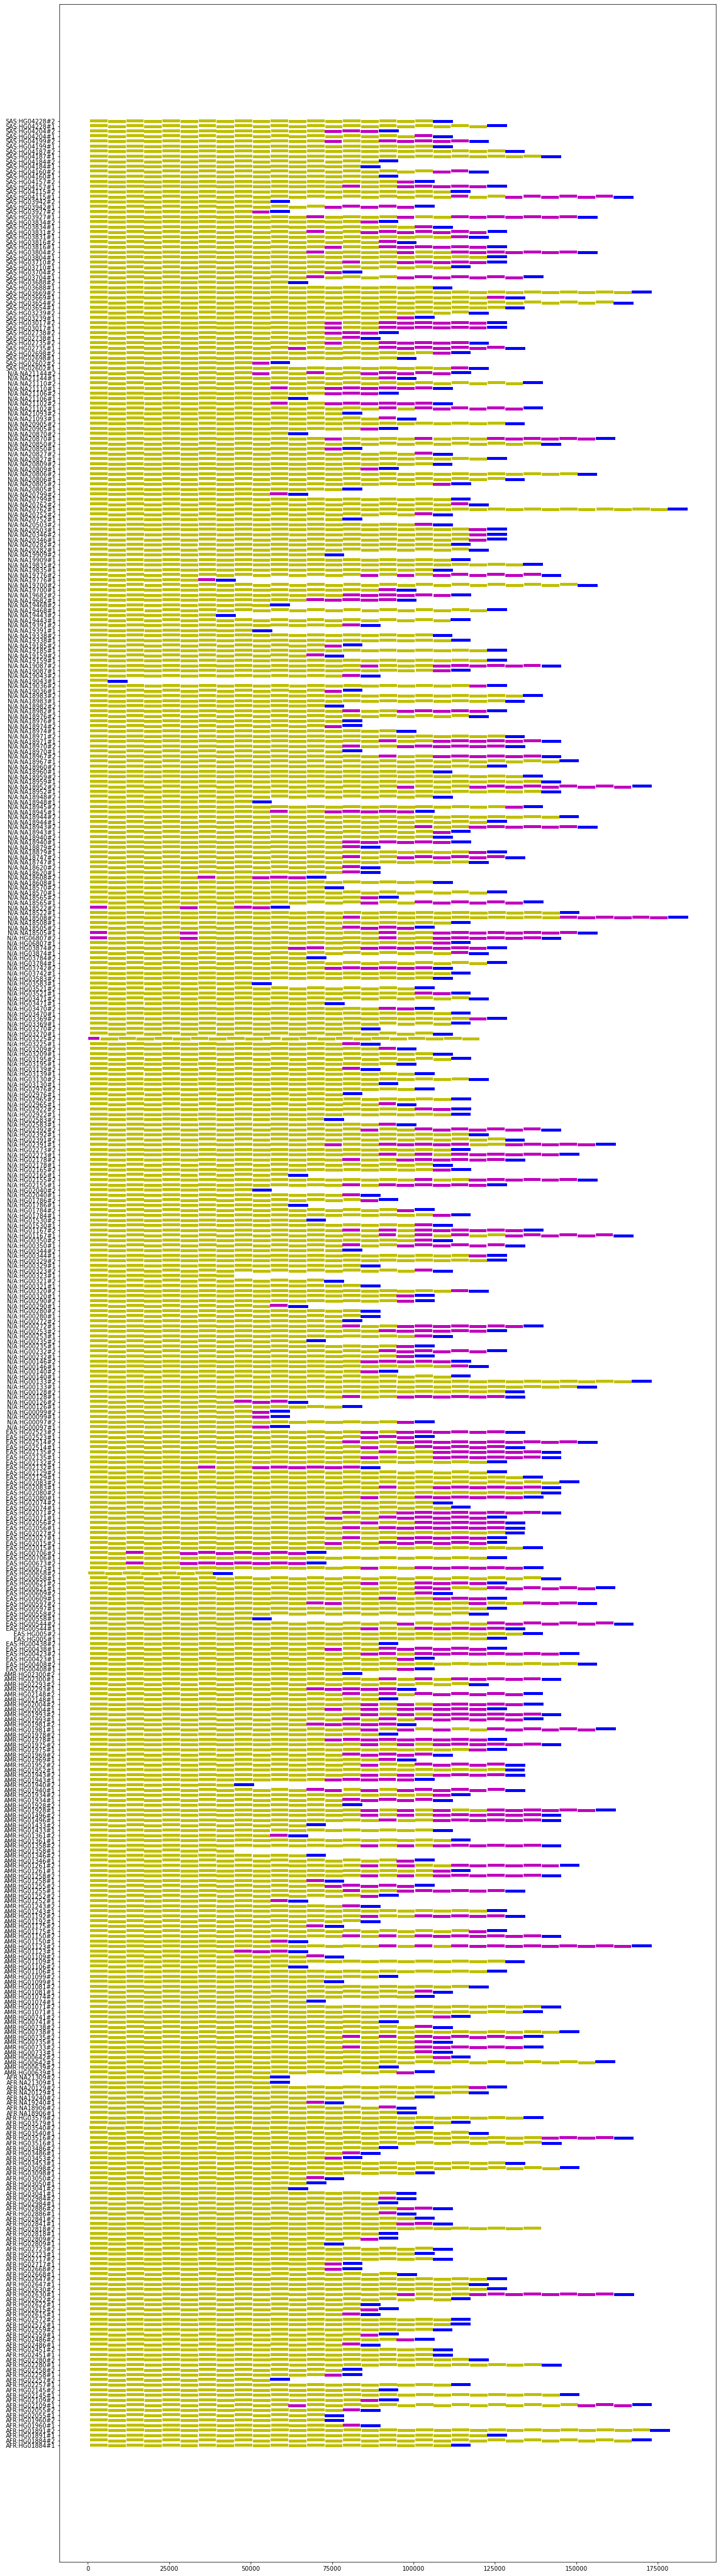

In [14]:
y = 1
ylabels = []
#plt.figure(figsize=(20,12))
n = len(ylabels)
plt.figure(figsize=(20, 80))



nk = []
for k in m_ranges:
    name = sdb1.get_name_by_id(k[0])
    e = emap.get(name.split("#")[0], "N/A")
    nk.append((e, name,k))
nk.sort()           
              
names = []
for e, name, k in nk:
 
    
    #print(name, m_ranges[k])
    #print(name)
    #if emap.get(name.split("#")[0], None) != "AFR":
    #    continue
    ylabels.append(e+":"+"#".join(name.split("#")[:2]))
    names.append(e+":"+"#".join(name.split("#")[:2]))
    j = 0
    jj = 0
    style = ["c-", "o-"]
    style2 = ["r-", "b-"]
    lw = [0.15, 0]
    for x0, x1, t in m_ranges[k]:
        #print(x0, x1, t)
        style = "y-" if t == 0 else "m-"
        if x1 - x0 < 3200:
            continue
            #plt.plot([x0+500, x1-500],[y+lw[jj%2],y+lw[jj%2]], "r-", linewidth=5 )
            #jj+=1
        elif x1 - x0 > 5800:
            plt.plot([x0+500, x1-500],[y+lw[jj%2],y+lw[jj%2]], "b-", linewidth=5 )
            jj+=1
        else:
            plt.plot([x0+500, x1-500],[y+lw[jj%2],y+lw[jj%2]], style, linewidth=5 )
            j+=1
            jj+=1
    y+=1
    #break
plt.yticks(list(range(1,1+len(ylabels))), ylabels);
#plt.savefig("LPA_krigle_repeat_pangenomics.pdf", format="pdf")
plt.savefig("LPA_krigle_repeat_pangenomics-463.png", dpi=300, bbox_inches="tight")


names.reverse()
for n in names:
    print(n)